In [1]:
# imports

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle
import os
from pdb import set_trace
from datetime import datetime

#plt.style.use('seaborn-pastel')
#plt.style.use('seaborn-white')
plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
#plt.style.use('ggplot')
#plt.style.use('seaborn')
#plt.style.use('seaborn-paper')

plt.rcParams['axes.facecolor']='none'
plt.rcParams['savefig.facecolor']='none'
plt.rcParams['ytick.labelsize']=15
plt.rcParams['xtick.labelsize']=15
plt.rcParams['font.size']=17

%matplotlib inline

--- 

# Histograms

In [2]:
df = pd.read_csv("../experiments/experiments.csv",index_col=0)

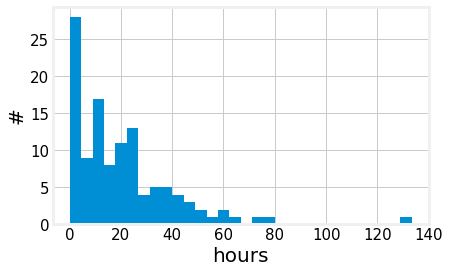

In [3]:
plt.figure(figsize=(6,4))
plt.xlabel("hours",fontsize=20)
plt.ylabel("#",fontsize=20)
plot = df[df.perf == False].hours.hist(bins=30)
plt.savefig("plots/hist_hours.pdf",bbox_inches="tight", pad_inches=0)

In [4]:
# number of experiments over 10 hours
1 - df[df.hours < 10].hours.count()/df[pd.isna(df.hours) == False].hours.count()

0.6551724137931034

In [63]:
df.hours.describe()

count    116.000000
mean      20.470866
std       20.247668
min        0.120833
25%        4.648339
50%       16.300042
75%       26.885559
max      133.342483
Name: hours, dtype: float64

In [6]:
# Total number of hours (in days)
df.hours.sum()/24

98.9425176632625

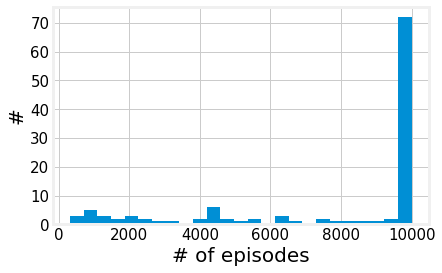

In [5]:
plt.figure(figsize=(6,4))
plt.xlabel("# of episodes",fontsize=20)
plt.ylabel("#",fontsize=20)
df[df.perf == False].n_ep.hist(bins=25)
plt.savefig("plots/hist_n_ep.pdf",bbox_inches="tight", pad_inches=0)

---

# memory plots

In [7]:
import mprof

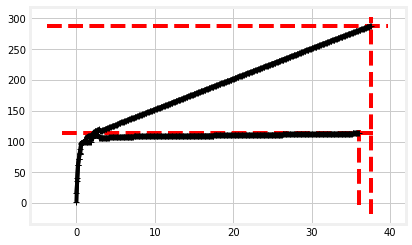

In [24]:
dict_solved = mprof.plot_file("/hdd/Documents/HRL/Memory_test/mprofile_20190729151034.dat")
dict_bad    = mprof.plot_file("/hdd/Documents/HRL/Memory_test/mprofile_20190729150843.dat")

t_solved = [elem - dict_solved['timestamp'][0] for elem in dict_solved['timestamp']]
t_bad    = [elem - dict_bad['timestamp'][0]    for elem in dict_bad['timestamp']]

In [23]:
print(dict.keys())

dict_keys(['mem_usage', 'timestamp', 'func_timestamp', 'filename', 'cmd_line', 'children'])


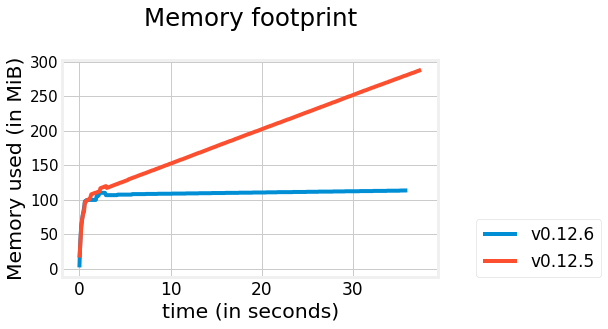

In [62]:
plt.plot(t_solved,dict_solved['mem_usage'],label="v0.12.6")
plt.plot(t_bad   ,dict_bad['mem_usage'],   label="v0.12.5")
plt.ylabel("Memory used (in MiB)")
plt.xlabel("time (in seconds)")
plt.legend(loc=[1.1,0])
plt.title("Memory footprint\n")
plt.savefig("plots/mem_profiler.pdf",bbox_inches="tight", pad_inches=0)

---
# Histogram of actions

In [2]:
n2n = EventAccumulator('/hdd/Documents/HRL/experiments/198_Nav_new/logs/extra/')
n2n.Reload()

In [107]:
n2n.CompressedHistograms('episode/actions')

[CompressedHistogramEvent(wall_time=1563830218.237008, step=52224, compressed_histogram_values=[CompressedHistogramValue(basis_point=0, value=0.0), CompressedHistogramValue(basis_point=668, value=0.09542857142857142), CompressedHistogramValue(basis_point=1587, value=0.22671428571428573), CompressedHistogramValue(basis_point=3085, value=0.8487700534759359), CompressedHistogramValue(basis_point=5000, value=1.1764705882352944), CompressedHistogramValue(basis_point=6915, value=2.2657943925233646), CompressedHistogramValue(basis_point=8413, value=3.0234418604651165), CompressedHistogramValue(basis_point=9332, value=3.759820224719101), CompressedHistogramValue(basis_point=10000, value=4.0)]),
 CompressedHistogramEvent(wall_time=1563830354.3028674, step=68544, compressed_histogram_values=[CompressedHistogramValue(basis_point=0, value=0.0), CompressedHistogramValue(basis_point=668, value=0.20166037735849054), CompressedHistogramValue(basis_point=1587, value=0.8261183800623053), CompressedHisto

In [88]:
wtimes,steps,actions = [],[],[]
for wtime,step,values in n2n.CompressedHistograms('episode/actions')[:]:
    for _,value in values:
        wtimes.append(wtime)
        steps.append(step)
        actions.append(value)

(array([253.,   0., 178.,   0.,   1., 139.,   0., 315.,   0., 114.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

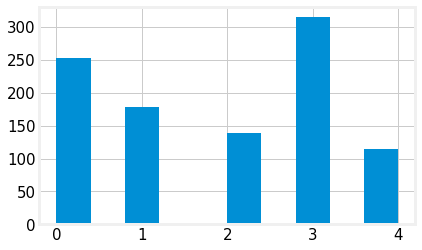

In [106]:
plt.hist(actions[-1000:])

In [93]:
wtimes[-1]-wtimes[0]

478833.0327885151

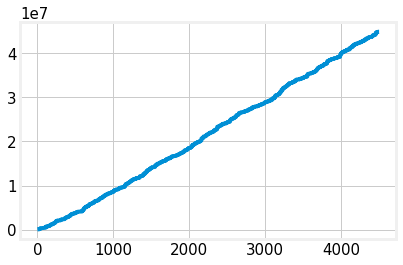

In [100]:
plt.plot(steps)